In [1]:
import sys 
sys.path.append("..") 
from collections import Counter
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt

from utils import data_helper,result_helper

In [2]:
unlabeled_ds_path='../data/train/unlabeled_data_processed.csv'
result_csv_path='../data/train/unlabeled_data_labeled.csv'
unlabeled_df=pd.read_csv(unlabeled_ds_path,index_col='id')

In [3]:
class_label_to_class_dict = {0: '家居', 1: '房产', 2: '教育', 3: '时尚', 4: '时政', 5: '科技', 6: '财经', 7: '游戏', 8: '娱乐', 9: '体育'}

shot_key_word_dict=dict()
shot_key_word_dict[7]=['通关', '礼包', '副本', '玩家', '普攻', '血量', '女妖', '玩法', '手游', '金币', '大招', '攻略', '游戏', '加成', '攻击力', '法师'] # 游戏
shot_key_word_dict[8]=['演技', '银幕', '传媒', '执导', '主创', '明星', '剧中', '影院', '片中', '导演', '票房', '出演', '播出', '剧本', '蜘蛛侠', '粉丝', '好莱坞', '该片', '预告片', '电视剧', '制片人', '影片', '上映', '主演', '喜剧', '领衔主演', '特辑', '饰演', '电影节', '影迷', '编剧', '剧组', '电影', '监制', '影业', '影视', '演员', '出品', '观影', '动画', '媒体', '该剧'] # 娱乐
shot_key_word_dict[9]=['女排', '运动员', '奥运会', '体育', 'NBA', '发球', '锦标赛', '参赛', '队员', '男排', '奥运', '羽毛球', '标准杆'] # 体育

In [4]:
num_words_based=2

sub_df=pd.DataFrame(columns=['cutted_content','class_label'])
for key in shot_key_word_dict.keys():
    words_in_other_keys=[]
    for other_key in shot_key_word_dict.keys():
        if key!=other_key:
            words_in_other_keys.extend(shot_key_word_dict[other_key])
    regex_pat_in_this_key='|'.join(str(word) for word in shot_key_word_dict[key])
    filtered_df_with_this_key=unlabeled_df[unlabeled_df['cutted_content'].str.contains(regex_pat_in_this_key,regex=True)]

    regex_pat_in_other_keys='|'.join(str(word) for word in words_in_other_keys)
    words_self_combine_list=list(combinations(shot_key_word_dict[key],num_words_based))
    print(class_label_to_class_dict[key],len(words_self_combine_list),'combinations')
    for words in words_self_combine_list:
        # print(word)
        # and: '(?=.*subpartA)(?=.*subpartB)'
        regex_pat_in_self_key=''.join('(?=.*'+str(word)+')' for word in words)

        filtered_df=filtered_df_with_this_key[filtered_df_with_this_key['cutted_content'].str.contains(regex_pat_in_self_key,regex=True)]
        filtered_df=filtered_df[~filtered_df['cutted_content'].str.contains(regex_pat_in_other_keys,regex=True)]
        
        filtered_df_with_this_key=filtered_df_with_this_key.drop(index=filtered_df.index)
        print(str(words),len(filtered_df),len(filtered_df_with_this_key))

        filtered_df['class_label']=class_label_to_class_dict[key]
        filtered_df['by_words']=' '.join(str(word) for word in words)
        
        sub_df=sub_df.append(filtered_df)
        
print(len(sub_df))
sub_df=sub_df.drop_duplicates(subset=['cutted_content']) # 去除重复的cutted_content
print(len(sub_df))
sub_df.to_csv(result_csv_path,index=False)

45 2844
('玩法', '加成') 14 2830
('玩法', '攻击力') 1 2829
('玩法', '法师') 21 2808
('手游', '金币') 2 2806
('手游', '大招') 4 2802
('手游', '攻略') 20 2782
('手游', '游戏') 33 2749
('手游', '加成') 5 2744
('手游', '攻击力') 0 2744
('手游', '法师') 0 2744
('金币', '大招') 1 2743
('金币', '攻略') 3 2740
('金币', '游戏') 3 2737
('金币', '加成') 0 2737
('金币', '攻击力') 0 2737
('金币', '法师') 2 2735
('大招', '攻略') 13 2722
('大招', '游戏') 15 2707
('大招', '加成') 4 2703
('大招', '攻击力') 1 2702
('大招', '法师') 1 2701
('攻略', '游戏') 37 2664
('攻略', '加成') 11 2653
('攻略', '攻击力') 5 2648
('攻略', '法师') 4 2644
('游戏', '加成') 4 2640
('游戏', '攻击力') 5 2635
('游戏', '法师') 5 2630
('加成', '攻击力') 5 2625
('加成', '法师') 1 2624
('攻击力', '法师') 0 2624
娱乐 861 combinations
('演技', '银幕') 86 8514
('演技', '传媒') 65 8449
('演技', '执导') 217 8232
('演技', '主创') 34 8198
('演技', '明星') 15 8183
('演技', '剧中') 104 8079
('演技', '影院') 7 8072
('演技', '片中') 22 8050
('演技', '导演') 32 8018
('演技', '票房') 3 8015
('演技', '出演') 17 7998
('演技', '播出') 18 7980
('演技', '剧本') 1 7979
('演技', '蜘蛛侠') 0 7979
('演技', '粉丝') 4 7975
('演技', '好莱坞') 0 7975
('

dict_keys(['娱乐', '游戏', '体育'])
娱乐    4207
游戏    3061
体育    1070
Name: class_label, dtype: int64


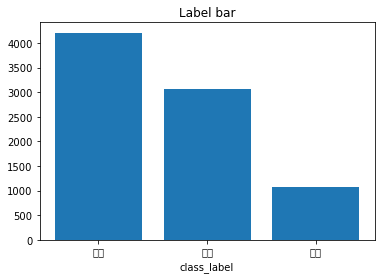

In [5]:
# 类别分布
label_cnts=dict(sub_df['class_label'].value_counts())
plt.bar(label_cnts.keys(),label_cnts.values())
plt.xlabel('class_label')
plt.title('Label bar')
print(label_cnts.keys())
print(sub_df['class_label'].value_counts())